# Solid function interpolation

In [1]:
import numpy as np
from matplotlib import pylab as plt
from scipy import linalg

## Define original function

In [2]:
%matplotlib inline

In [3]:
def func1(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)

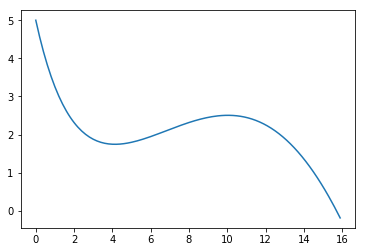

In [4]:
x = np.arange(0, 16, 0.1)
y = func1(x)

plt.plot(x, y)
plt.show()

## Approximating with n=1

In [18]:
def build_matrix_n(values, n):
    result = []
    for v in values:
        result.append([v ** p for p in range(0, n + 1)])
    return np.array(result)

def approx(values, func, n):
    return linalg.solve(build_matrix_n(values, n), func(values))
    
def approx_func(x, w):
    result = np.zeros(len(x))
    for n in range(len(w)):
        result += w[n] * x ** n
    return result

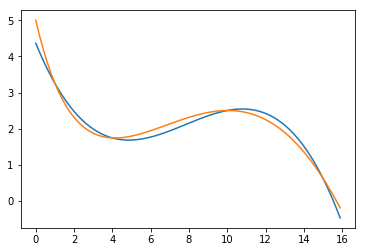

In [25]:
m = approx(np.array([1, 4, 10, 15]), func1, n=3)

y1 = approx_func(x, m)
plt.plot(x, y1)
plt.plot(x, y)
plt.show()

## Write solution to file

In [29]:
with open('data/1c2w_approx_result.txt', 'w') as f:
    f.write(' '.join(str(round(r, 3)) for r in m))

In [30]:
!cat data/1c2w_approx_result.txt

4.363 -1.296 0.193 -0.008